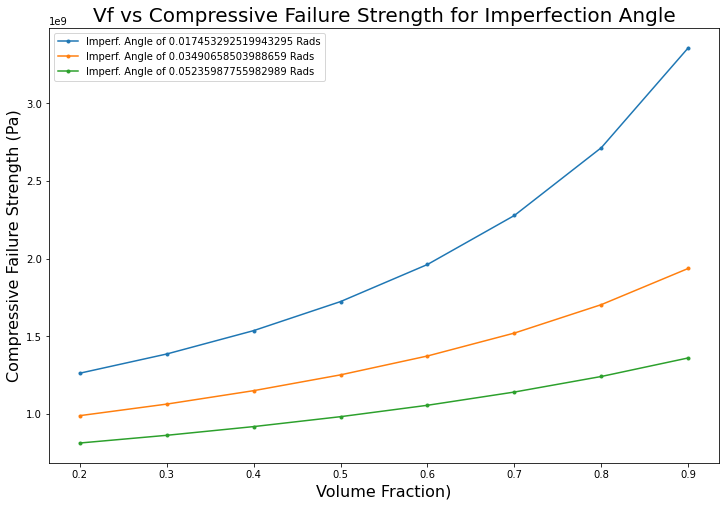

In [8]:
##Problem 3 

import numpy as np
import math as m
import matplotlib.pyplot as plt 

Vf = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
Gf = 110e9
Gm = 1.4e9

psi = [m.radians(1), m.radians(2), m.radians(3)]
sy = 80e6
S_C_list = []
plt.figure(figsize = (12,8))
for angle in psi:
    for V in Vf:
        G12 = 1/((V/Gf)+((1-V)/Gm))
        S_C = 1/((1/G12)+(angle/sy))
        S_C_list.append(S_C)
        
    plt.plot(Vf,S_C_list,'.-',label = 'Imperf. Angle of {} Rads'.format(angle))    
    plt.xlabel('Volume Fraction)',fontsize = 16)
    plt.ylabel('Compressive Failure Strength (Pa)',fontsize = 16)
    plt.title('Vf vs Compressive Failure Strength for Imperfection Angle', fontsize = 20)
    plt.legend();
    S_C_list = []
    
    
    
        
    



In [84]:
###Problem 7 

def TsaiHill(sig1,sig2,tau12,sig_app):
    if (sig_app[0]/sig1)**2 + (sig_app[1]/sig2)**2 - (sig_app[0]*sig_app[1])/(sig1**2) + (sig_app[2]/tau12)**2 > 1:
        return True
    else:
        return False 
        
def MaxStress(sig1,sig2,tau12,sig_app):
    if sig1 <= sig_app[0]:
        return True
    elif sig2 <= sig_app[1]:
        return True
    elif tau12 <= sig_app[2]:
        return True
    else:
        return False
        
        


In [85]:
TsaiHill(2100, 100, 180,[2000,110,100])
MaxStress(2100, 100, 180, [2000,110,100])
TsaiHill(2100, 100, 180,[2200,90,80])
MaxStress(2100, 100, 180, [2200,90,80])
TsaiHill(2100, 100, 180,[1800,60,200])
MaxStress(2100, 100, 180, [1800,60,200])

True

In [86]:
###Problem 8 
import numpy as np


def T_matrix(theta):
    T = np.zeros((3,3))
    theta = np.deg2rad(theta)
    T[0,0] =  T[1,1] = np.cos(theta)**2
    T[0,1] =  T[1,0] = np.sin(theta)**2
    T[0,2] =  2*np.cos(theta)*np.sin(theta)
    T[1,2] = -2*np.cos(theta)*np.sin(theta)
    T[2,0] = -np.cos(theta)*np.sin(theta)
    T[2,1] =  np.cos(theta)*np.sin(theta)
    T[2,2] =  np.cos(theta)**2 - np.sin(theta)**2
    return T

def LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion):
    sig_app_transform = T_matrix(angle).dot(sig_app)
    
    if criterion == 'Tsai-Hill':
        if TsaiHill(sig1,sig2,tau12,sig_app_transform) == True:
            print('Fails according to Tsai-Hill criterion at {} degrees'.format(angle))
        else:
            print('Does not fail according to Tsai-Hill criterion at {} degrees'.format(angle))
    elif criterion == 'Max Stress':
        if MaxStress(sig1,sig2,tau12,sig_app_transform) == True:
            print('Fails according to the max stress criterion at {} degrees'.format(angle))
        else:
            print('Does not fail according to the max stress criterion at {} degrees'.format(angle))
            


In [87]:
sig_app = np.array([[300],[80],[100]])
sig1 = 900
sig2 = 150
tau12 = 200



criterion = 'Tsai-Hill'
for angle in range(0,90,1):
    LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)
 

criterion = 'Max Stress'
for angle in range(0,90,1):
    LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)
    


Does not fail according to Tsai-Hill criterion at 0 degrees
Does not fail according to Tsai-Hill criterion at 1 degrees
Does not fail according to Tsai-Hill criterion at 2 degrees
Does not fail according to Tsai-Hill criterion at 3 degrees
Does not fail according to Tsai-Hill criterion at 4 degrees
Does not fail according to Tsai-Hill criterion at 5 degrees
Does not fail according to Tsai-Hill criterion at 6 degrees
Does not fail according to Tsai-Hill criterion at 7 degrees
Does not fail according to Tsai-Hill criterion at 8 degrees
Does not fail according to Tsai-Hill criterion at 9 degrees
Does not fail according to Tsai-Hill criterion at 10 degrees
Does not fail according to Tsai-Hill criterion at 11 degrees
Does not fail according to Tsai-Hill criterion at 12 degrees
Does not fail according to Tsai-Hill criterion at 13 degrees
Does not fail according to Tsai-Hill criterion at 14 degrees
Does not fail according to Tsai-Hill criterion at 15 degrees
Does not fail according to Tsai-Hi

In [91]:
###Narrowing down angle for stress failures
sig_app = np.array([[300],[80],[100]])
sig1 = 900
sig2 = 150
tau12 = 200
angle = 58.33
sig_app_transform = T_matrix(angle).dot(sig_app)
print(sig_app_transform)

criterion = 'Max Stress'
LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)

angle = 58.34
LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)

criterion = 'Tsai-Hill'
angle = 50.1
LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)
angle = 50.2
LaminaFail(sig_app, angle, sig1, sig2, tau12, criterion)

[[ 230.01201363]
 [ 149.98798637]
 [-143.17485382]]
Does not fail according to the max stress criterion at 58.33 degrees
Fails according to the max stress criterion at 58.34 degrees
Does not fail according to Tsai-Hill criterion at 50.1 degrees
Fails according to Tsai-Hill criterion at 50.2 degrees
